Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing the dataset

In [2]:
dataset = pd.read_csv("datasets/loan_data_set.csv")

In [3]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Handling Missing Values

In [4]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
dataset['Gender']=dataset['Gender'].fillna(dataset['Gender'].mode().values[0])
dataset['Married']=dataset['Married'].fillna(dataset['Married'].mode().values[0])
dataset['Dependents']=dataset['Dependents'].fillna(dataset['Dependents'].mode().values[0])
dataset['Self_Employed']=dataset['Self_Employed'].fillna(dataset['Self_Employed'].mode().values[0])
dataset['LoanAmount']=dataset['LoanAmount'].fillna(dataset['LoanAmount'].mean())
dataset['Loan_Amount_Term']=dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].mode().values[0] )
dataset['Credit_History']=dataset['Credit_History'].fillna(dataset['Credit_History'].mode().values[0] )

In [6]:
dataset.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Dropping unnecessary columns

In [7]:
dataset.drop('Loan_ID', axis=1, inplace=True)

In [8]:
dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


Exploratory Data Analysis

In [9]:
dataset.shape

(614, 12)

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


Visualization

Gender
Male      502
Female    112
Name: count, dtype: int64

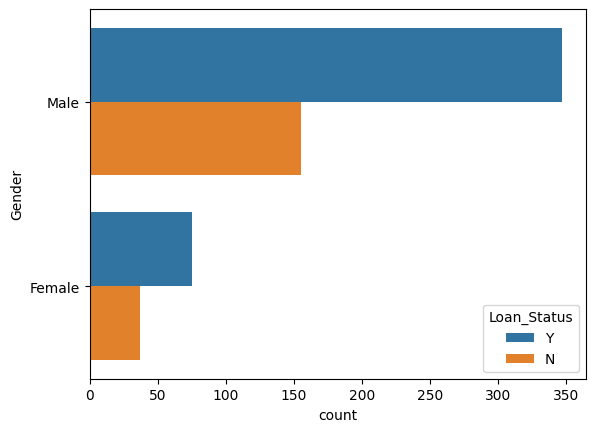

In [11]:
#Gender obtaining the maximum number of loans
sns.countplot(y = 'Gender', hue = 'Loan_Status', data = dataset)
dataset['Gender'].value_counts()

Married
Yes    401
No     213
Name: count, dtype: int64

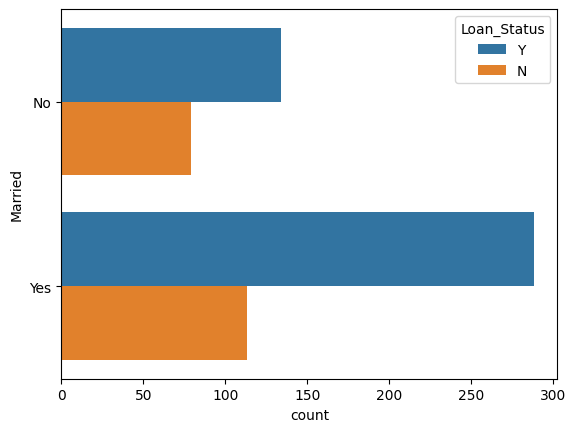

In [12]:
#Does marital status affect loan approval?
sns.countplot(y= 'Married', hue= 'Loan_Status', data= dataset)
dataset['Married'].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

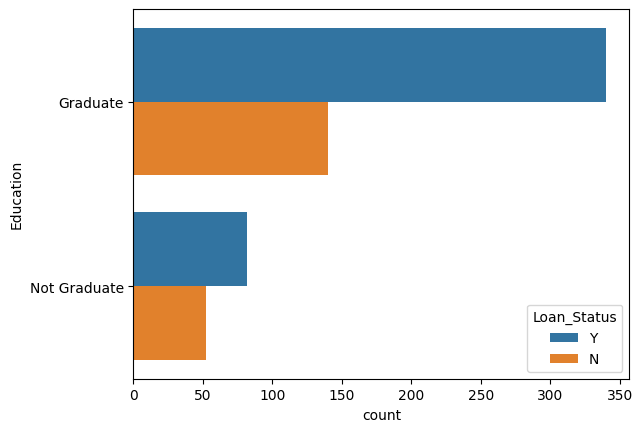

In [13]:
# Does education status affect loan approval?
sns.countplot(y = 'Education', hue = 'Loan_Status', data = dataset)
dataset['Education'].value_counts()

Self_Employed
No     532
Yes     82
Name: count, dtype: int64

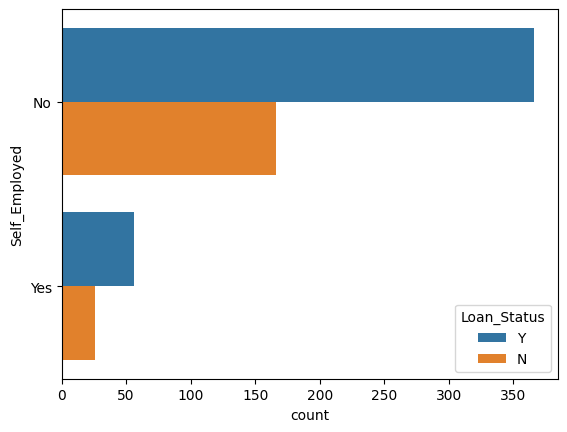

In [14]:
#Does employment affect loan approval?
sns.countplot(y= 'Self_Employed', hue= 'Loan_Status', data= dataset)
dataset['Self_Employed'].value_counts()

<Axes: xlabel='count', ylabel='Credit_History'>

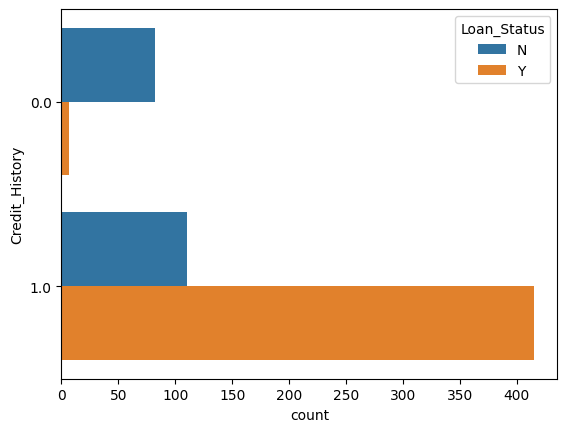

In [15]:
#Does credit history affect loan approval?
sns.countplot(y= 'Credit_History', hue= 'Loan_Status', data=dataset)

In [16]:
#Converting some object data type to int
gender = {"Female": 0, "Male": 1}
yes_no = {'No' : 0,'Yes' : 1}
dependents = {'0':0,'1':1,'2':2,'3+':3}
education = {'Not Graduate' : 0, 'Graduate' : 1}
property = {'Semiurban' : 0, 'Urban' : 1,'Rural' : 2}
output = {"N": 0, "Y": 1}
dataset['Gender'] = dataset['Gender'].replace(gender)
dataset['Married'] = dataset['Married'].replace(yes_no)
dataset['Dependents'] = dataset['Dependents'].replace(dependents)
dataset['Education'] = dataset['Education'].replace(education)
dataset['Self_Employed'] = dataset['Self_Employed'].replace(yes_no)
dataset['Property_Area'] = dataset['Property_Area'].replace(property)
dataset['Loan_Status'] = dataset['Loan_Status'].replace(output)

In [17]:
dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,2,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1,1


Model Building

In [18]:
#Setting the value for dependent and independent variables
x = dataset.drop('Loan_Status', axis=1)  # Independent variables (features)
y = dataset['Loan_Status']  # Dependent variable (target)

In [19]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(x, y, test_size= 0.25, random_state=38, stratify = y)

Implementing the KNN Model

In [20]:
#Fitting the KNN model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [21]:
#Prediction of test set
prediction_knn = knn.predict(X_test)
#Print the predicted values
print("Prediction for test set: {}".format(prediction_knn))

Prediction for test set: [1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1
 1 1 1 0 1 1]


Model Evaluation

In [22]:
#Actual value and the predicted value
a = pd.DataFrame({'Actual value': Y_test, 'Predicted value': prediction_knn})
a.head()

,Actual value,Predicted value
263,1,1
395,1,1
226,0,0
413,1,1
403,1,0


              precision    recall  f1-score   support

           0       0.39      0.19      0.25        48
           1       0.70      0.87      0.78       106

    accuracy                           0.66       154
   macro avg       0.55      0.53      0.51       154
weighted avg       0.61      0.66      0.61       154



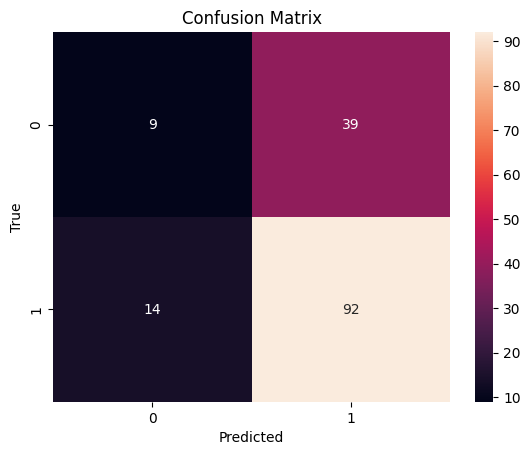

In [23]:
#Confusion matrix and classification report
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix
matrix = confusion_matrix(Y_test, prediction_knn)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(Y_test, prediction_knn))